In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#Calling on csv to create a data frame
tsdata = pd.read_csv('taylor_swift_spotify.csv')
tsdata.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206


In [56]:
#Printing all album names to identify excess or repeated albums
print(tsdata['album'].unique())

['Midnights (3am Edition)' 'Midnights' "Red (Taylor's Version)"
 "Fearless (Taylor's Version)" 'evermore (deluxe version)' 'evermore'
 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]'
 'folklore (deluxe version)' 'folklore' 'Lover'
 'Taylor Swift Karaoke: reputation' 'reputation'
 'reputation (Big Machine Radio Release Special)'
 'reputation Stadium Tour Surprise Song Playlist'
 'Taylor Swift Karaoke: 1989 (Deluxe)' '1989'
 '1989 (Big Machine Radio Release Special)'
 'Taylor Swift Karaoke: 1989 (Deluxe Edition)'
 'Taylor Swift Karaoke: 1989' '1989 (Deluxe Edition)' '1989 (Deluxe)'
 'Red' 'Red (Deluxe Edition)' 'Red (Big Machine Radio Release Special)'
 'Red (Karaoke Version)' 'Taylor Swift Karaoke: Red'
 'Speak Now (Japanese Version)' 'Speak Now World Tour Live' 'Speak Now'
 'Speak Now (Big Machine Radio Release Special)'
 'Speak Now (Karaoke Version)' 'Taylor Swift Karaoke: Speak Now'
 'Speak Now (Deluxe Edition)' 'Speak Now (US Version)'
 'Speak N

In [57]:
#Data cleaning, filtering out excess albums
filteredalbums = ['Midnights (3am Edition)',"Red (Taylor's Version)","Fearless (Taylor's Version)",'evermore','folklore','Lover','reputation','1989','Speak Now','Taylor Swift']
ts=tsdata[tsdata['album'].isin(filteredalbums)]
print(ts['album'].unique())

['Midnights (3am Edition)' "Red (Taylor's Version)"
 "Fearless (Taylor's Version)" 'evermore' 'folklore' 'Lover' 'reputation'
 '1989' 'Speak Now' 'Taylor Swift']


In [58]:
#Create dictionary to store average popularity for each album
albumpop = {}

#Find average popularity for each album
for album in filteredalbums:
    albumdata=ts[ts['album']==(album)] #Create a df to sort by album
    avgpop = albumdata['popularity'].mean() #Calculate avg pop of each album
    albumpop[album]=avgpop #Fill the dictionary as album:avgpop

In [59]:
#Make data frame to store calculated values such as album, color, album popularity, etc.
colors=['darkblue', 'darkred','goldenrod','saddlebrown','gray','lightpink','black','lightblue','purple','lightgreen']
df=pd.DataFrame()
df['Album']=filteredalbums
df['Color']=colors
df['Album_Popularity']=albumpop.values()
print(df)

                         Album        Color  Album_Popularity
0      Midnights (3am Edition)     darkblue         65.750000
1       Red (Taylor's Version)      darkred         60.400000
2  Fearless (Taylor's Version)    goldenrod         69.538462
3                     evermore  saddlebrown         52.222222
4                     folklore         gray         59.937500
5                        Lover    lightpink         79.444444
6                   reputation        black         79.200000
7                         1989    lightblue         53.512821
8                    Speak Now       purple         65.142857
9                 Taylor Swift   lightgreen         60.833333


Text(0, 0.5, 'Popularity')

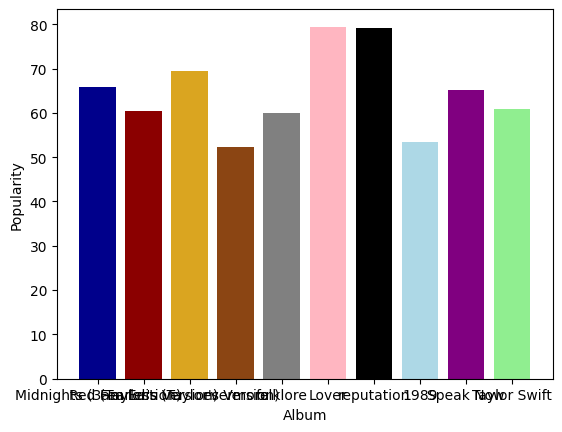

In [60]:
#Make bar chart for album popularity where x=dictionary keys, y=dictionary values
plt.bar(df['Album'],df['Album_Popularity'],color=df['Color'])
plt.xlabel('Album')
plt.ylabel('Popularity')